In [1]:
using Revise

In [2]:
includet("AbstractGames.jl")
includet("SymmetricGames.jl")
includet("RandomGames.jl")
includet("nash.jl")
includet("SimplexPlots.jl")

In [17]:
players = 50
strategies = 3
gaussians = 200
gmg = gaussian_mixture_game(players, strategies, gaussians)
fine_grid = mixture_grid(strategies, 89)
coarse_grid = simplex_project(mixture_grid(strategies, 13), .99)
regret_grid = regret(gmg, fine_grid);

In [18]:
reg_thresh = 1e-4
rd_trace = logged_replicator_dynamics(gmg, coarse_grid; offset=-1000, iters=10000);
rd_endpoints = rd_trace[:,:,end]
rd_equilibria = filter_unique(filter_regrets(gmg, rd_endpoints, threshold=reg_thresh), max_diff=0.02) 
println("Replicator Dynamics found ", size(rd_equilibria, 2), " equilibria:")
display(round.(rd_equilibria, digits=2))
println("Regrets: ", round.(regret(gmg, rd_equilibria), sigdigits=3))

Replicator Dynamics found 4 equilibria:


3×4 Matrix{Float64}:
 0.0   0.98  0.78  0.0
 0.57  0.0   0.22  0.41
 0.43  0.02  0.0   0.59

Regrets: [-1.14e-13, 1.49e-6, 1.36e-5, 3.61e-5]



kpathsea: Running mktextfm phvr8t
/usr/share/texlive/texmf-dist/web2c/mktexnam: Could not map source abbreviation  for phvr8t.
/usr/share/texlive/texmf-dist/web2c/mktexnam: Need to update ?
mktextfm: Running mf-nowin -progname=mf \mode:=ljfour; mag:=1; nonstopmode; input phvr8t
This is METAFONT, Version 2.7182818 (TeX Live 2019/Debian) (preloaded base=mf)

kpathsea: Running mktexmf phvr8t

! I can't find file `phvr8t'.
<*> ...:=ljfour; mag:=1; nonstopmode; input phvr8t
                                                  
Please type another input file name
! Emergency stop.
<*> ...:=ljfour; mag:=1; nonstopmode; input phvr8t
                                                  
Transcript written on mfput.log.
grep: phvr8t.log: No such file or directory
mktextfm: `mf-nowin -progname=mf \mode:=ljfour; mag:=1; nonstopmode; input phvr8t' failed to make phvr8t.tfm.
kpathsea: Appending font creation commands to missfont.log.

kpathsea: Running mktextfm phvr8t
/usr/share/texlive/texmf-dist/web2c/

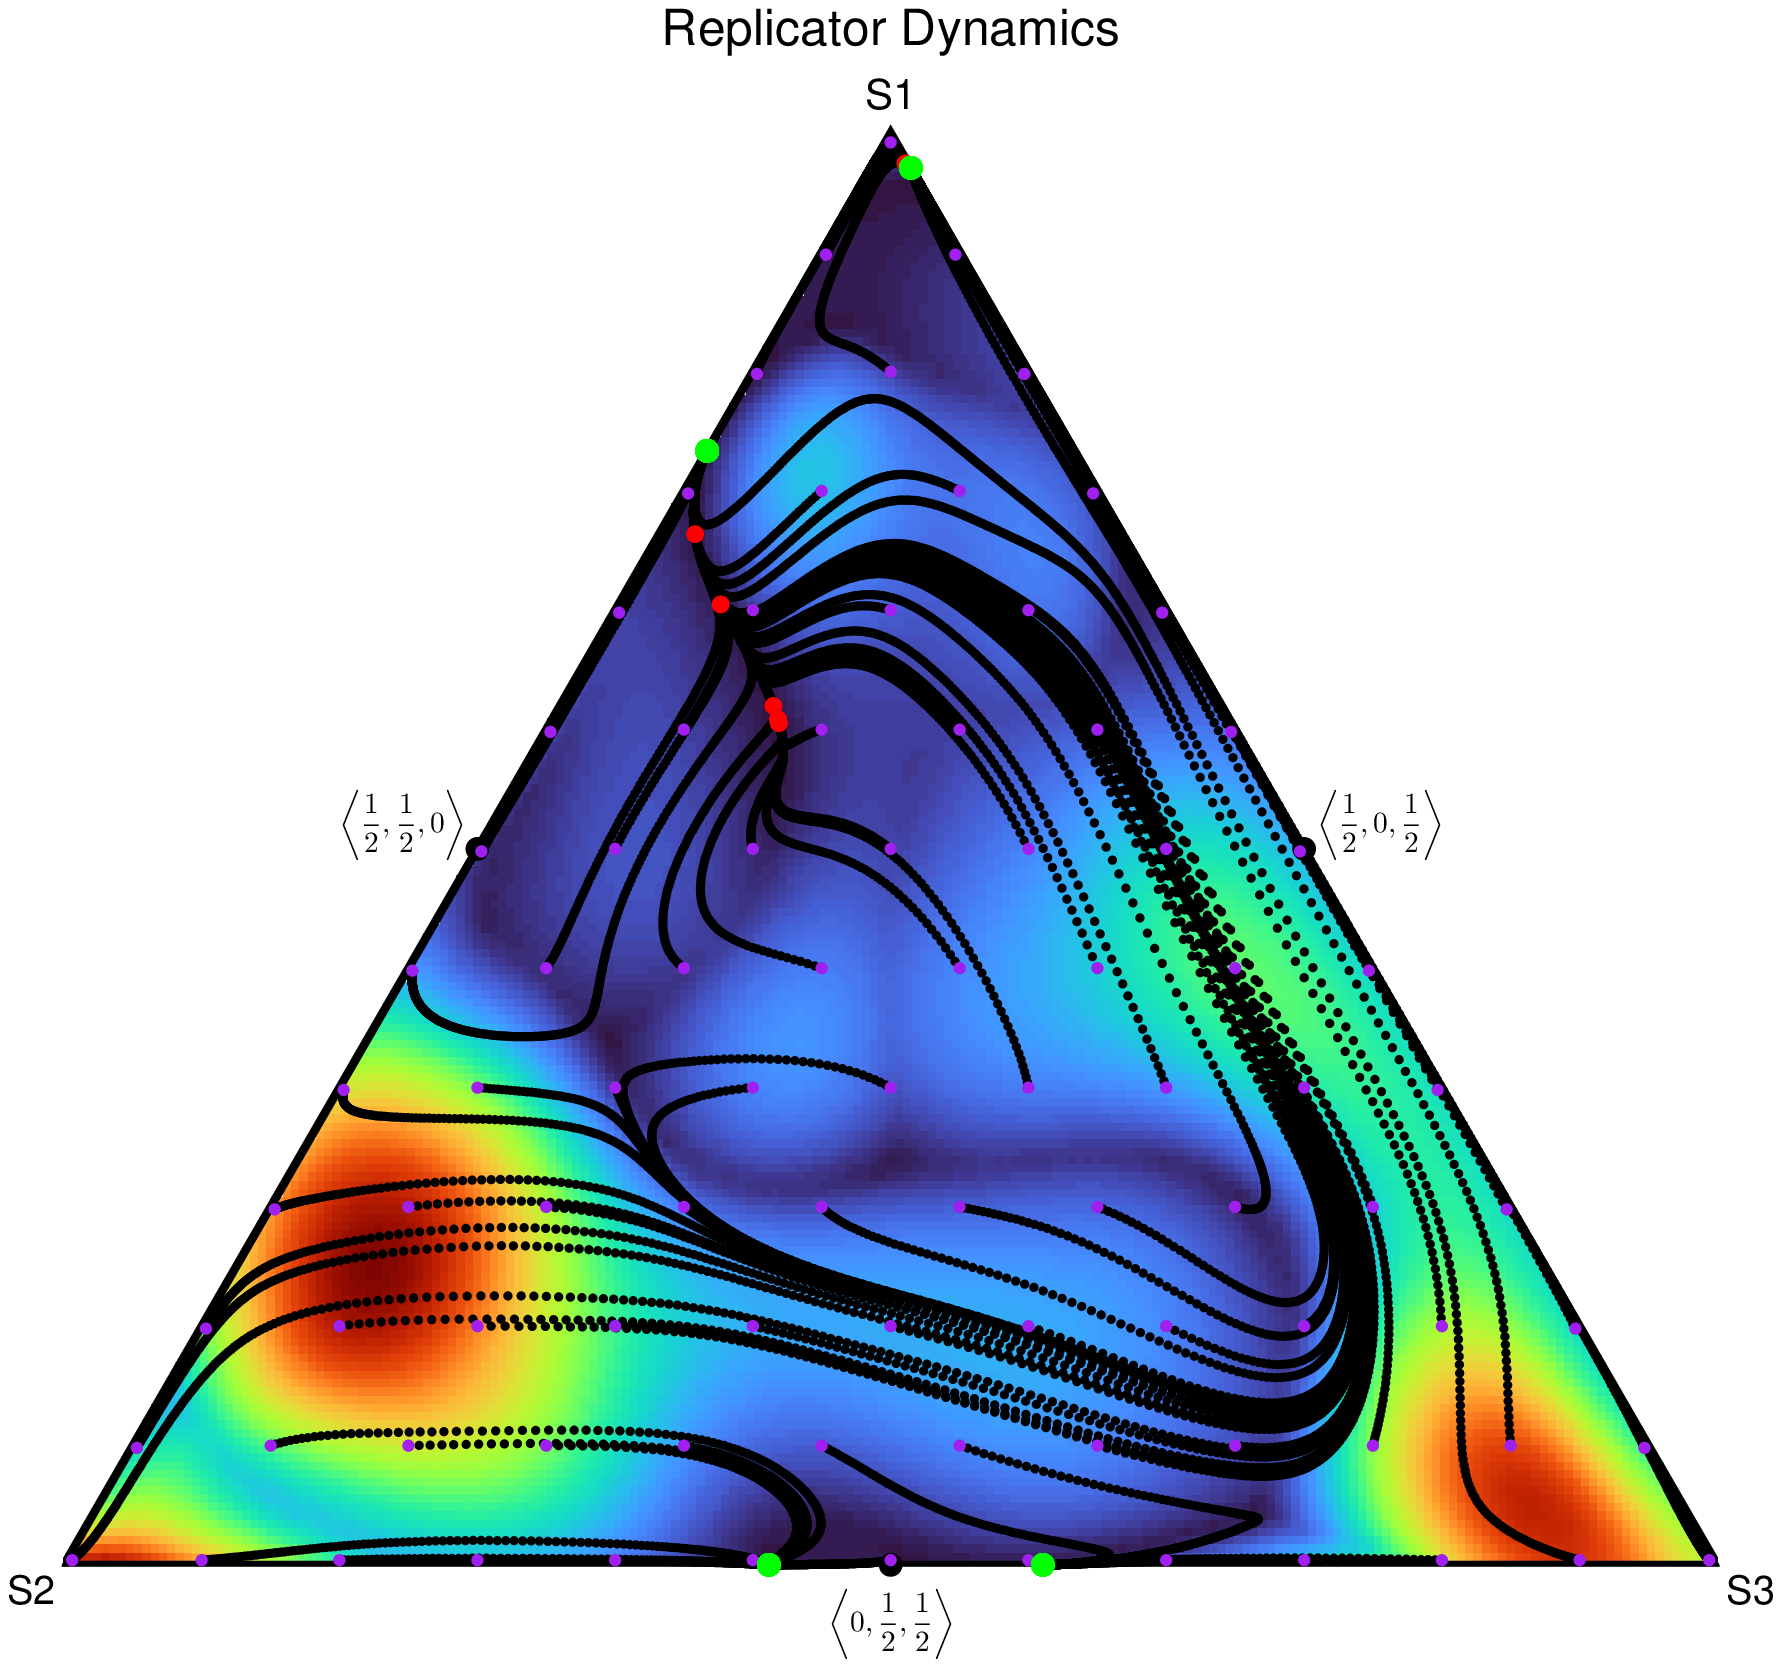

In [19]:
simplex_heatmap(fine_grid, regret_grid, show=false, title="Replicator Dynamics")
for i in 1:size(coarse_grid,2)
    simplex_scatter!(rd_trace[:,i,2:1000], marker=:p, markersize=.075, show=false)
end
simplex_scatter!(rd_trace[:,:,1], marker=:p, markersize=.1, markerfacecolor=:purple)
for i in 1:size(coarse_grid,2)
    if regret(gmg, rd_trace[:,i,1001]) >= reg_thresh
        simplex_scatter!(rd_trace[:,i,1001], marker=:p, markersize=.15, markerfacecolor=:red, show=false)
    end
end
for i in 1:size(coarse_grid,2)
    if regret(gmg, rd_trace[:,i,1001]) < reg_thresh
        simplex_scatter!(rd_trace[:,i,1001], marker=:p, markersize=.2, markerfacecolor=:green, show=false)
    end
end
plot!(show=true)

In [20]:
reg_thresh = 1e-4
gd_trace = logged_gain_descent(gmg, coarse_grid, step_size=[1e-5 * .99^i for i in 1:10000], iters=10000)
gd_endpoints = gd_trace[:,:,end]
gd_equilibria = filter_unique(filter_regrets(gmg, gd_endpoints, threshold=reg_thresh), max_diff=0.02) 
println("Gradient Descent found ", size(gd_equilibria, 2), " equilibria:")
display(round.(gd_equilibria, digits=2))
println("Regrets: ", round.(regret(gmg, gd_equilibria), sigdigits=3))

Gradient Descent found 5 equilibria:


3×5 Matrix{Float64}:
 0.98  0.36  0.28  0.0   0.03
 0.0   0.49  0.36  0.57  0.26
 0.02  0.15  0.36  0.43  0.71

Regrets: [-1.14e-13, -1.14e-13, 6.57e-5, -1.14e-13, -1.14e-13]



kpathsea: Running mktextfm phvr8t
/usr/share/texlive/texmf-dist/web2c/mktexnam: Could not map source abbreviation  for phvr8t.
/usr/share/texlive/texmf-dist/web2c/mktexnam: Need to update ?
mktextfm: Running mf-nowin -progname=mf \mode:=ljfour; mag:=1; nonstopmode; input phvr8t
This is METAFONT, Version 2.7182818 (TeX Live 2019/Debian) (preloaded base=mf)

kpathsea: Running mktexmf phvr8t

! I can't find file `phvr8t'.
<*> ...:=ljfour; mag:=1; nonstopmode; input phvr8t
                                                  
Please type another input file name
! Emergency stop.
<*> ...:=ljfour; mag:=1; nonstopmode; input phvr8t
                                                  
Transcript written on mfput.log.
grep: phvr8t.log: No such file or directory
mktextfm: `mf-nowin -progname=mf \mode:=ljfour; mag:=1; nonstopmode; input phvr8t' failed to make phvr8t.tfm.
kpathsea: Appending font creation commands to missfont.log.

kpathsea: Running mktextfm phvr8t
/usr/share/texlive/texmf-dist/web2c/

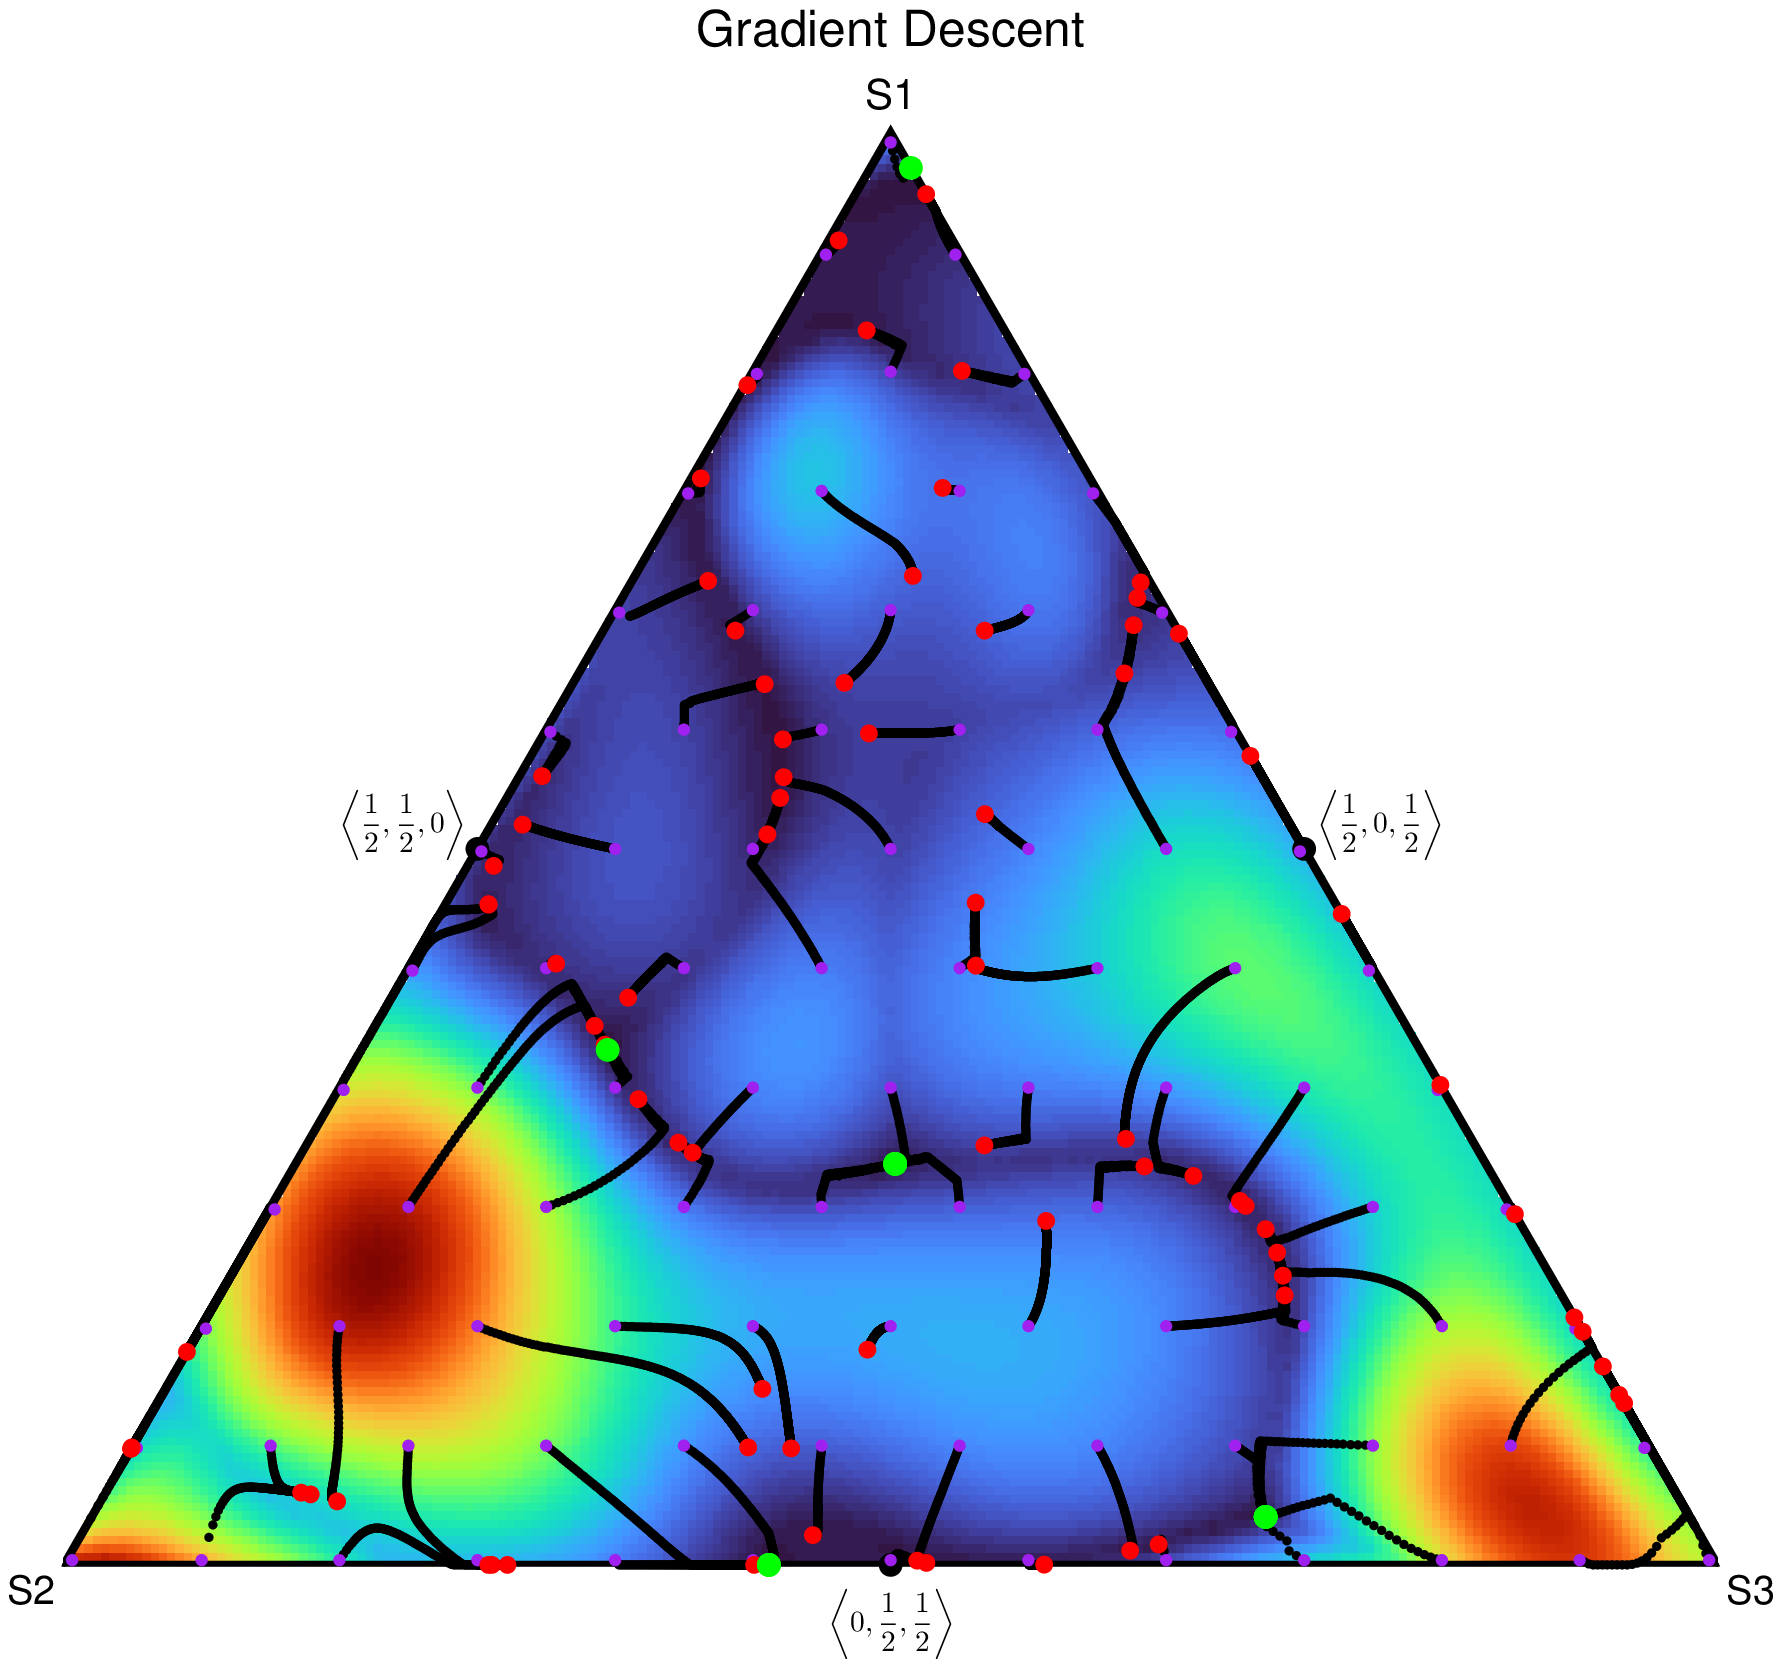

In [21]:
simplex_heatmap(fine_grid, regret_grid, show=false, title="Gradient Descent")
for i in 1:size(coarse_grid,2)
    simplex_scatter!(gd_trace[:,i,2:1000], marker=:p, markersize=.075, show=false)
end
simplex_scatter!(gd_trace[:,:,1], marker=:p, markersize=.1, markerfacecolor=:purple)
for i in 1:size(coarse_grid,2)
    if regret(gmg, gd_trace[:,i,1001]) >= reg_thresh
        simplex_scatter!(gd_trace[:,i,1001], marker=:p, markersize=.15, markerfacecolor=:red, show=false)
    end
end
for i in 1:size(coarse_grid,2)
    if regret(gmg, gd_trace[:,i,1001]) < reg_thresh
        simplex_scatter!(gd_trace[:,i,1001], marker=:p, markersize=.2, markerfacecolor=:green, show=false)
    end
end
plot!(show=true)

In [36]:
players = 50
gaussians = 200
gmg5 = gaussian_mixture_game(players, 5, gaussians)
grid5 = simplex_project(mixture_grid(5, 6), .99)

5×126 Matrix{Float64}:
 0.992  0.797  0.797  0.797  0.797  …  0.002  0.002  0.002  0.002  0.002
 0.002  0.197  0.002  0.002  0.002     0.002  0.002  0.002  0.002  0.002
 0.002  0.002  0.197  0.002  0.002     0.002  0.002  0.002  0.002  0.002
 0.002  0.002  0.002  0.197  0.002     0.797  0.597  0.397  0.197  0.002
 0.002  0.002  0.002  0.002  0.197     0.197  0.397  0.597  0.797  0.992

In [56]:
reg_thresh = 1e-4
rd5_endpoints = replicator_dynamics(gmg5, grid5; offset=-1000, iters=5000);
rd5_equilibria = filter_unique(filter_regrets(gmg5, rd5_endpoints, threshold=reg_thresh), max_diff=0.02) 
println("Replicator Dynamics found ", size(rd5_equilibria, 2), " equilibria:")
display(round.(rd5_equilibria, digits=2))
println("Regrets: ", round.(regret(gmg5, rd5_equilibria), sigdigits=3))

Replicator Dynamics found 5 equilibria:


5×5 Matrix{Float64}:
 0.0   0.0   0.51  0.38  0.32
 0.59  0.0   0.0   0.0   0.37
 0.23  0.0   0.0   0.62  0.3
 0.0   0.51  0.31  0.0   0.0
 0.18  0.49  0.18  0.0   0.0

Regrets: [3.88e-5, 7.15e-10, 1.33e-9, 2.31e-5, 1.71e-7]


In [51]:
reg_thresh = 1e-4
gd5_endpoints = batch_nash(gain_descent, gmg5, grid5, 30; step_size=[1e-5 * .99^i for i in 1:10000], iters=10000)
gd5_equilibria = filter_unique(filter_regrets(gmg5, gd5_endpoints, threshold=reg_thresh), max_diff=0.02) 
println("Gradient Descent found ", size(gd5_equilibria, 2), " equilibria:")
display(round.(gd5_equilibria, digits=2))
println("Regrets: ", round.(regret(gmg5, gd5_equilibria), sigdigits=3))

Gradient Descent found 3 equilibria:


5×3 Matrix{Float64}:
 0.26  0.14  0.02
 0.4   0.14  0.15
 0.02  0.24  0.11
 0.14  0.16  0.53
 0.19  0.32  0.2

Regrets: [7.38e-5, 2.77e-5, 1.16e-6]


In [53]:
reg_thresh = 1e-3
gd5_short_endpoints = batch_nash(gain_descent, gmg5, grid5, 30; step_size=[1e-5 * .99^i for i in 1:10000], iters=1000)
gd5_short_equilibria = filter_unique(filter_regrets(gmg5, gd5_short_endpoints, threshold=reg_thresh), max_diff=0.02) 
println("Gradient Descent found ", size(gd5_short_equilibria, 2), " equilibria:")
display(round.(gd5_short_equilibria, digits=2))
println("Regrets: ", round.(regret(gmg5, gd5_short_equilibria), sigdigits=3))

Gradient Descent found 3 equilibria:


5×3 Matrix{Float64}:
 0.26  0.14  0.02
 0.4   0.14  0.15
 0.02  0.24  0.11
 0.14  0.16  0.53
 0.19  0.32  0.2

Regrets: [7.38e-5, 2.77e-5, 0.0]
